In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузим библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Подготовка и тщательный анализ данных.

### Загрузка и просмотр данных

Загрузим данные из файлов:

*   data_description.txt;

*   sample_submission.csv;

*   test.csv;

*   train.csv

data_description.txt - описание данных

In [ ]:
from typing_extensions import DefaultDict
# Что представляют из себя данные файла "data_description.txt"?
with open('/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/data_description.txt', 'r') as f:
    data_description = f.read()
    print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

sample_submission.csv - образец представления данных

In [ ]:
# Что представляют из себя данные файла "sample_submission.csv"?
sample_submission_df = pd.read_csv("/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/sample_submission.csv")
sample_submission_df.sample(5)

Id      SalePrice
775   2236  178483.353073
1004  2465  175370.990918
301   1762  191507.251873
967   2428  199926.378957
566   2027  153353.334124

test.csv - тестовая выборка, используется для оценки качества работы модели на новых данных. Она содержит только признаки, а целевые значения отсутствуют. Модель использует обученные зависимости для предсказания целевых значений на тестовой выборке, и результаты сравниваются с известными целевыми значениями (которые в этом случае скрыты), чтобы оценить точность модели.

In [ ]:
# Что представляют из себя данные файла "test.csv"?
test_df = pd.read_csv("/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/test.csv")
test_df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
424  1885          20       RL         90.0    15750   Pave   NaN      Reg   
181  1642          60       FV         70.0     7000   Pave   NaN      Reg   
102  1563          20       RL         65.0     7832   Pave   NaN      Reg   
546  2007          20       FV         85.0    10625   Pave   NaN      Reg   
939  2400          50       RL         51.0     3500   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
424         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
181         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
102         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
546         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
939         Lvl    AllPub  ...           0        0    NaN  MnPrv        Shed   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
424       0      6    2009        WD         Normal  
181       0      6    2009        WD         Normal  
102       0      5    2010        WD         Normal  
546       0      6    2008        WD         Normal  
939    2000      7    2007        WD         Normal  

[5 rows x 80 columns]

In [ ]:
# Проверим наличие пропущенных значений:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
# Посмотрим на размер этой таблицы
test_df.shape

(1459, 80)

train.csv - обучающая выборка, используется для обучения модели на основе исторических данных, которые содержат признаки и соответствующие им целевые значения. Модель использует эти данные для нахождения зависимостей между признаками и целевой переменной, которые позволяют ей предсказывать целевые значения на новых данных.

In [ ]:
# Что представляют из себя данные файла "train.csv"?
train_df = pd.read_csv("/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/train.csv")
train_df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1370  1371          50       RL         90.0     5400   Pave   NaN      Reg   
436    437          50       RM         40.0     4400   Pave   NaN      Reg   
524    525          60       RL         95.0    11787   Pave   NaN      IR1   
58      59          60       RL         66.0    13682   Pave   NaN      IR2   
109    110          20       RL        105.0    11751   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1370         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
436          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
524          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
58           HLS    AllPub  ...        0    NaN    NaN         NaN       0   
109          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1370     10   2009        WD         Normal     105000  
436      10   2006        WD         Normal     116000  
524       8   2007        WD         Normal     315750  
58       10   2006       New        Partial     438780  
109       1   2010       COD         Normal     190000  

[5 rows x 81 columns]

In [ ]:
# Ознакомимся с данными
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
# Проверим наличие пропущенных значений:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Обратим внимание, что в обучающей выборке строк представлено на одну больше. Один из возможных вариантов, почему в выборке train на одну строку больше, чем в выборке test, может быть связан с тем, одна строка отложена из общего набора данных для последующей проверки качества модели. Это называется "отложенной выборкой" (holdout set) и используется для того, чтобы измерить точность модели на независимом наборе данных.

In [ ]:
# Посмотрим на размер этой таблицы
train_df.shape

(1460, 81)

### Разобьем данные на training sample и validation sample.

Проведем предобработку данных. В первую очередь следует заменить пропущенные значения. Например, можно заполнить их медианой.

Медиана - это числовое значение, которое разделяет набор данных на две равные половины. Если упорядочить набор данных по возрастанию или убыванию, то медиана будет находиться посередине этого списка. То есть, половина значений будут меньше медианы, а другая половина - больше.

In [ ]:
train_df.fillna(train_df.median(numeric_only=True), inplace=True)
train_df.to_csv("/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/new_train.csv", index=False)
test_df.fillna(test_df.median(numeric_only=True), inplace=True)
test_df.to_csv("/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/new_test.csv", index=False)

Проверим на наличие выбросов (outliers) и удалим их при необходимости. Для этого можно использовать график (например, boxplot).

<Axes: xlabel='SalePrice'>

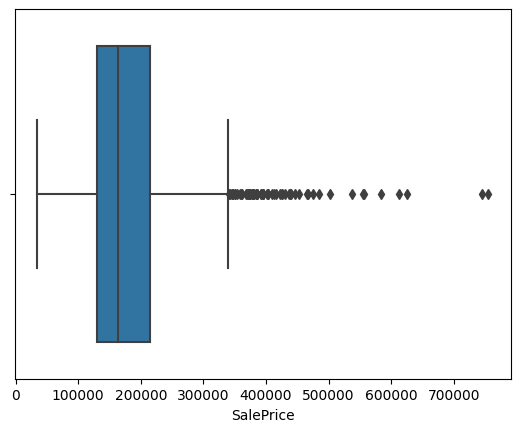

In [ ]:
sns.boxplot(x=train_df['SalePrice'])

In [ ]:
# определение межквартильного расстояния
Q1 = train_df['SalePrice'].quantile(0.25)
Q3 = train_df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# определение границ выбросов
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# определение выбросов
outliers = train_df[(train_df['SalePrice'] < lower_bound) | (train_df['SalePrice'] > upper_bound)]

print("Количество выбросов в колонке 'SalePrice': ", len(outliers))

Количество выбросов в колонке 'SalePrice':  61


Удалим выбросы.

In [ ]:
# удаление выбросов
clean_train_df = train_df[(train_df['SalePrice'] > lower_bound) & (train_df['SalePrice'] < upper_bound)]

# сохранение результата в файл
clean_train_df.to_csv('/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/new_train.csv', index=False)

<Axes: xlabel='SalePrice'>

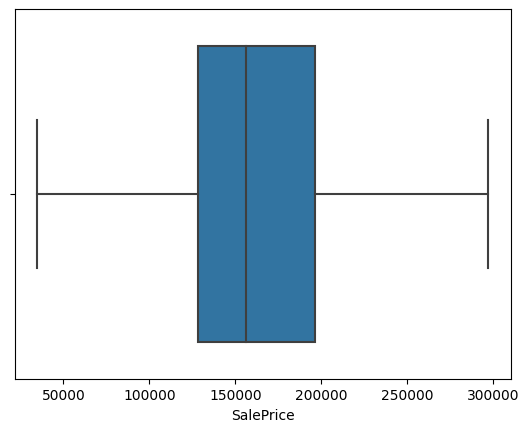

In [ ]:
# еще раз проверим файл на наличие выбросов
sns.boxplot(x=clean_train_df['SalePrice'])

In [ ]:
# еще раз проверим файл на наличие выбросов
# определение межквартильного расстояния
Q1 = clean_train_df['SalePrice'].quantile(0.25)
Q3 = clean_train_df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# определение границ выбросов
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# определение выбросов
outliers = clean_train_df[(clean_train_df['SalePrice'] < lower_bound) | (clean_train_df['SalePrice'] > upper_bound)]

print("Количество выбросов в колонке 'SalePrice': ", len(outliers))

Количество выбросов в колонке 'SalePrice':  33


Далее следует преобразовать категориальные признаки в числовые. Для этого можно воспользоваться методом get_dummies().

In [ ]:
clean_train_df = pd.get_dummies(clean_train_df)
test_df = pd.get_dummies(test_df)

После этого можно разбить данные на training sample и validation sample. Для этого можно воспользоваться функцией train_test_split() из библиотеки sklearn.

In [ ]:
from sklearn.model_selection import train_test_split
X = clean_train_df.drop('SalePrice', axis=1)
y = clean_train_df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

В результате получим две выборки: X_train и y_train - training sample и X_val и y_val - validation sample. Training sample будет использоваться для обучения модели, а validation sample - для оценки качества модели на новых данных.

В конце сохраним обработанные данные.

In [ ]:
X_train.to_csv("/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/X_train.csv", index=False)
y_train.to_csv("/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/y_train.csv", index=False)
X_val.to_csv("/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/X_val.csv", index=False)
y_val.to_csv("/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/y_val.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Data Science/Профильный модуль/Групповой проект №2/House_prices/test_processed.csv", index=False)

### Проанализируем признаки. Отберем те, которые нам кажутся наиболее важными. Посмотрим на их распределение (в том числе на попарные). Посмотрим на совместное распределение целевой переменной и выбранных признаков. 

Для анализа признаков и отбора наиболее важных признаков можно использовать методы корреляции и модели случайного леса.

Модель случайного леса является одним из наиболее мощных и универсальных методов машинного обучения, который может использоваться для различных типов задач, включая задачи классификации и регрессии.

Случайный лес - это алгоритм машинного обучения, который создает множество деревьев решений и комбинирует их для улучшения точности прогнозирования. Каждое дерево обучается на подмножестве данных, выбирая случайным образом признаки для каждого разделения. Затем каждое дерево используется для прогнозирования целевой переменной, а результаты комбинируются для получения окончательного прогноза.

Модель случайного леса имеет несколько преимуществ, которые делают ее полезной для анализа датасетов, таких как:

*    Устойчивость к выбросам и шумам в данных.
*    Способность обрабатывать большое количество признаков, в том числе нелинейные и взаимодействующие между собой.
*    Способность оценивать важность признаков для целевой переменной.


В случае с прогнозированием стоимости домов, модель случайного леса может быть полезна, потому что она может обрабатывать большое количество признаков, включая категориальные и числовые, а также взаимодействия между ними. Кроме того, модель случайного леса может оценить важность каждого признака для прогнозирования целевой переменной, что может помочь в определении наиболее значимых признаков для моделирования.

                             Id  MSSubClass  LotFrontage   LotArea  \
Id                     1.000000    0.006703     0.003292 -0.015152   
MSSubClass             0.006703    1.000000    -0.361707 -0.149714   
LotFrontage            0.003292   -0.361707     1.000000  0.310615   
LotArea               -0.015152   -0.149714     0.310615  1.000000   
OverallQual           -0.016500    0.066951     0.183611  0.070548   
...                         ...         ...          ...       ...   
SaleCondition_AdjLand -0.035887    0.015659    -0.036208 -0.013852   
SaleCondition_Alloca  -0.007900    0.027924    -0.019382  0.013731   
SaleCondition_Family   0.004100   -0.000668     0.021562 -0.007977   
SaleCondition_Normal   0.010136    0.011948    -0.043643  0.007900   
SaleCondition_Partial -0.008787   -0.031617     0.093490  0.016505   

                       OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                       -0.016500     0.008625  -0.008484     -0.017613   
MSSubCl

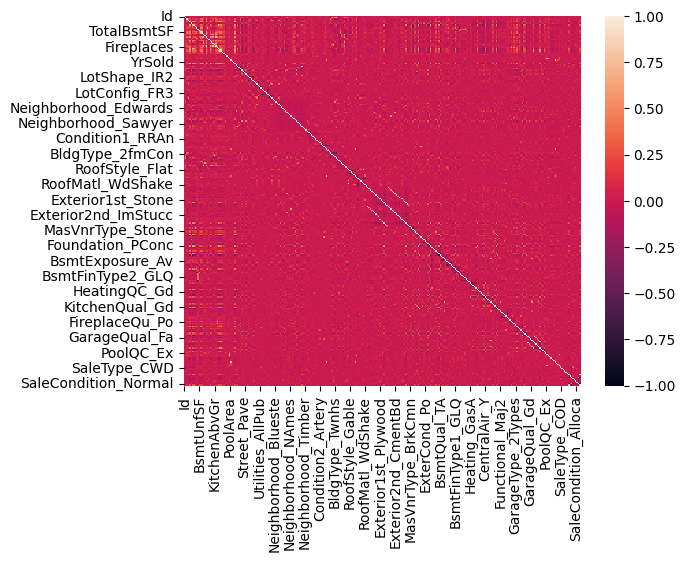

Количество выбранных признаков на основе корреляции:  14
Важности признаков на основе модели случайного леса:
                  importance
OverallQual         0.552491
GrLivArea           0.161345
TotalBsmtSF         0.087279
GarageArea          0.062677
YearBuilt           0.037720
1stFlrSF            0.034834
YearRemodAdd        0.027292
GarageCars          0.020210
KitchenQual_TA      0.006028
FullBath            0.004321
ExterQual_Gd        0.002176
Foundation_PConc    0.002053
ExterQual_TA        0.001574


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Создать матрицу корреляции между всеми признаками
corr_matrix = clean_train_df.corr()

# Вывести матрицу корреляции
print(corr_matrix)

# Нарисовать тепловую карту корреляции

sns.heatmap(corr_matrix)
plt.show()

# Выбрать только признаки, которые имеют корреляцию с целевой переменной больше или равной 0.5
corr_threshold = 0.5
corr_features = corr_matrix[abs(corr_matrix['SalePrice']) >= corr_threshold].index.tolist()
print("Количество выбранных признаков на основе корреляции: ", len(corr_features))

# Выделить признаки и целевую переменную
X = clean_train_df[corr_features].drop(['SalePrice'], axis=1)
y = clean_train_df['SalePrice']

# Создать модель случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучить модель на выбранных признаках и целевой переменной
rf.fit(X, y)

# Вывести важности признаков, полученные с помощью модели случайного леса
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Важности признаков на основе модели случайного леса:")
print(feature_importances)

Построим график попарных зависимостей признаков.

На графиках можно увидеть сильную корреляцию между ценой объекта и признаками OverallQual, GrLivArea, TotalBsmtSF, GarageArea, YearBuilt, можно заметить наличие выбросов и нелинейных зависимостей между некоторыми признаками.

Для более детального анализа распределения признаков и их связи с целевой переменной построим графики распределения и зависимости от целевой переменной.

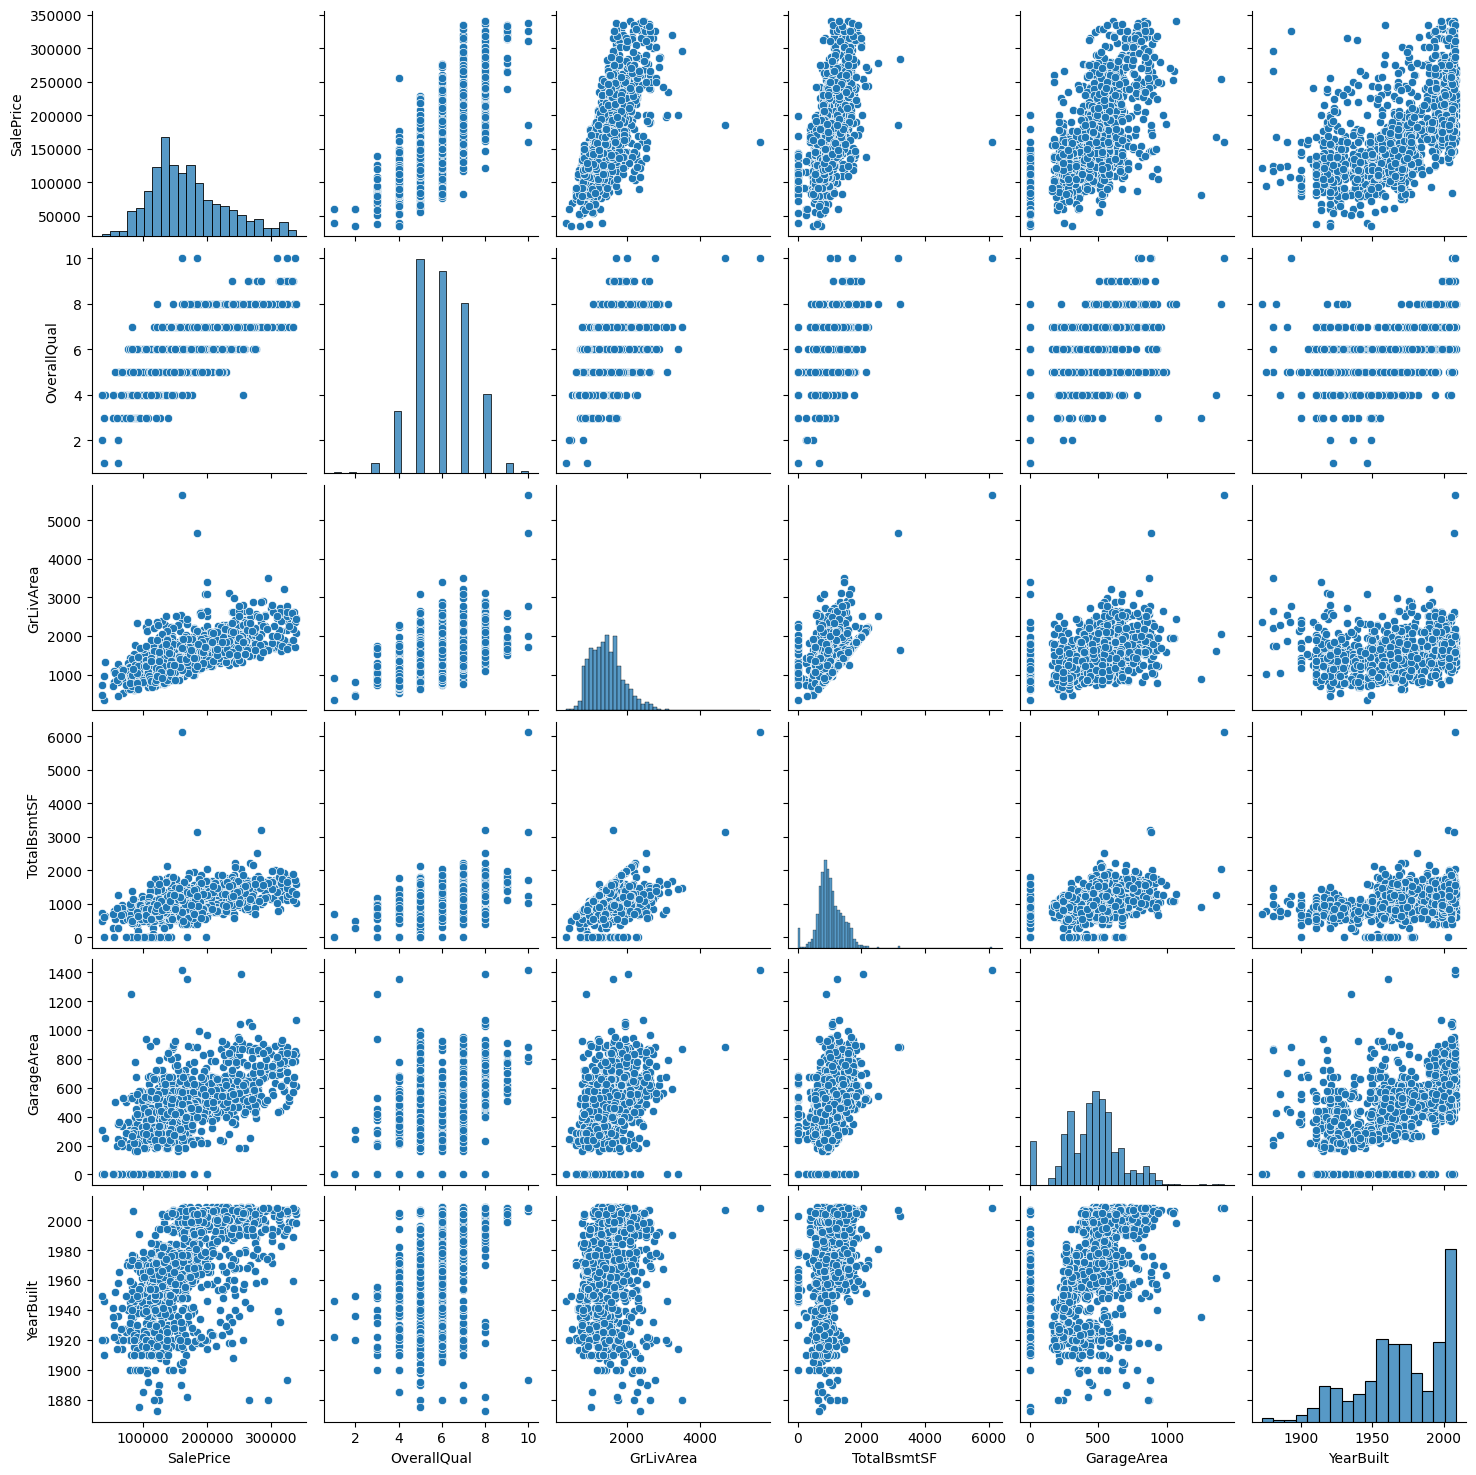

In [ ]:
sns.pairplot(clean_train_df[['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']])
plt.show()

### Сформулируем гипотезы о том, какие сочетания признаков могут быть полезны. Добавим их: отрисуем выборку на карте, посчитаем расстояние до важных объектов в этом городе, посчитаем статистики по районам и по ближайшим объектам.

На основе этого анализа можно отобрать наиболее важные признаки и использовать их для построения модели. Например, можно выбрать следующие признаки:

-    OverallQual; 
-    GrLivArea;
-    TotalBsmtSF;
-    GarageArea;
-    YearBuilt.

График распределения значений целевой переменной SalePrice в обучающей выборке train_df позволяет оценить, как распределены значения целевой переменной и может помочь в выборе метода прогнозирования. Например, если значения целевой переменной распределены нормально, то можно использовать линейную регрессию. Если распределение не является нормальным, то можно использовать другие методы, например, деревья решений или случайный лес. Также график может помочь определить выбросы (outliers) и их влияние на модель.

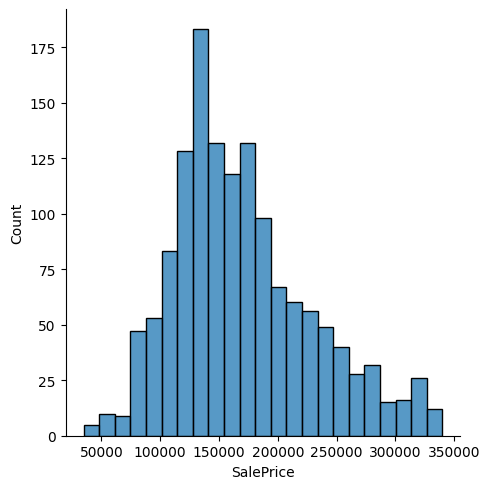

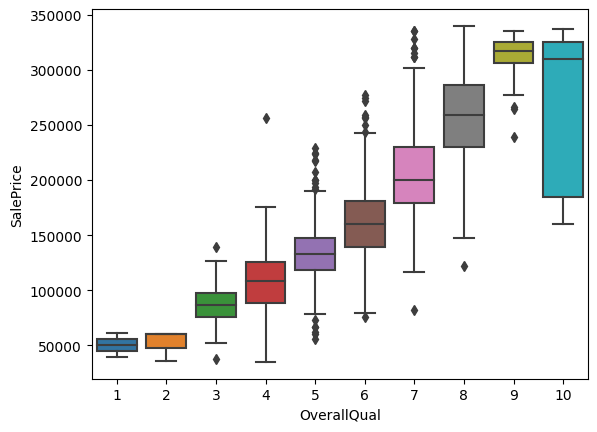

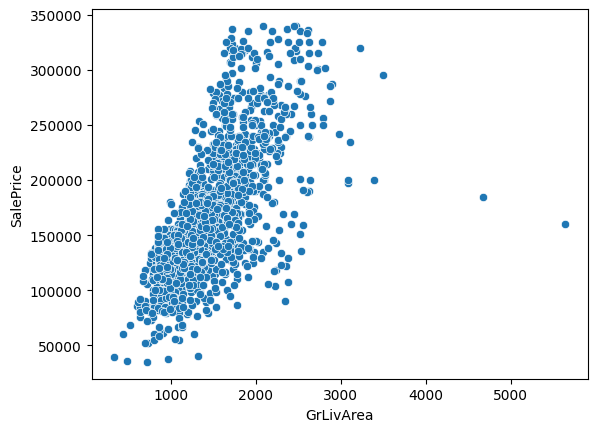

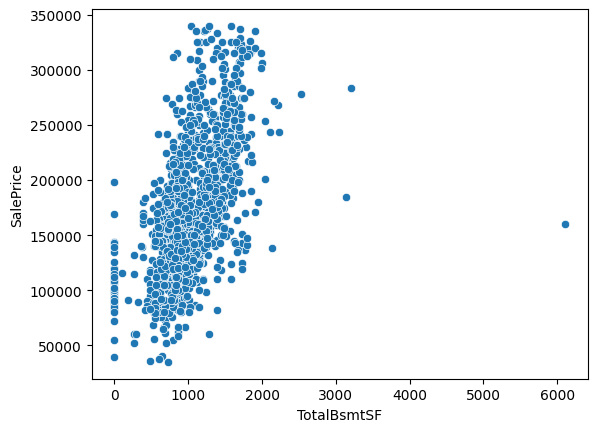

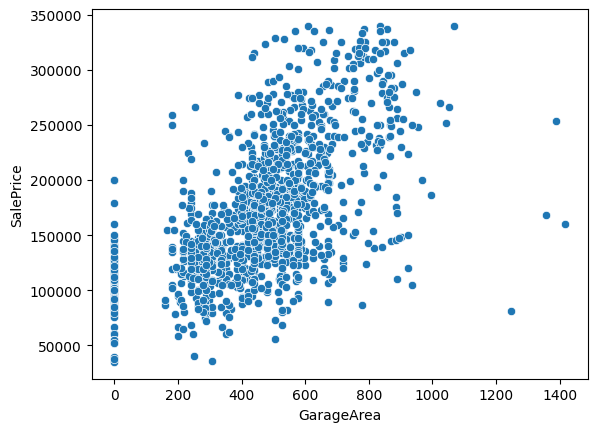

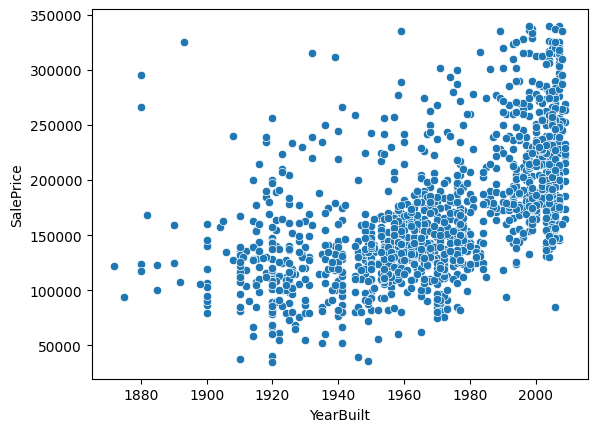

In [ ]:
sns.displot(clean_train_df['SalePrice']) # график распределения значений целевой переменной SalePrice в обучающей выборке clean_train_df
plt.show()

sns.boxplot(x='OverallQual', y='SalePrice', data=clean_train_df)
plt.show()

sns.scatterplot(x='GrLivArea', y='SalePrice', data=clean_train_df)
plt.show()

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=clean_train_df)
plt.show()

sns.scatterplot(x='GarageArea', y='SalePrice', data=clean_train_df)
plt.show()

sns.scatterplot(x='YearBuilt', y='SalePrice', data=clean_train_df)
plt.show()

Теперь можно использовать эти признаки для обучения модели.

In [ ]:
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
X_train_selected = X_train[features]
X_val_selected = X_val[features]
test_selected = test_df[features]

# 2. Выбор алгоритма и его гиперпараметров.

### Обоснование выбора алгоритма/его конкретной реализации.

Выбор алгоритма и его гиперпараметров зависит от конкретной задачи машинного обучения и ее особенностей. Однако, в случае задачи предсказания цены дома, можно рассмотреть несколько алгоритмов:

1. Линейная регрессия (Linear Regression) - классический алгоритм для решения задачи регрессии. Он основывается на поиске линейной зависимости между признаками и целевой переменной. Для работы с линейной регрессией в Python можно использовать библиотеки Scikit-learn или Statsmodels.

2. Решающие деревья (Decision Trees) - алгоритм, основанный на построении дерева решений. Каждый узел дерева соответствует признаку, а каждая ветвь - значению признака. Решающие деревья могут работать с категориальными и числовыми признаками. В Python для работы с решающими деревьями можно использовать библиотеку Scikit-learn.

3. Случайный лес (Random Forest) - ансамблевый алгоритм, основанный на множестве решающих деревьев. Случайный лес уменьшает переобучение и повышает точность предсказаний, используя случайность при построении каждого дерева. В Python для работы с случайным лесом также можно использовать библиотеку Scikit-learn.

Выбор конкретной реализации алгоритма и его гиперпараметров зависит от многих факторов, таких как размер и структура данных, наличие выбросов и пропущенных значений, выбранные признаки, и т.д. 

На основе представленных данных сложно точно сказать, какую модель выбрать приоритетнее, так как неизвестно, какие алгоритмы машинного обучения были рассмотрены и какие гиперпараметры были выбраны. Однако, можно провести некоторые рассуждения на основе выбранных признаков и данных.

1. features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt'] - выбранные признаки
2. X_train_selected = X_train[features] - подмножество обучающей выборки с выбранными признаками
3. X_val_selected = X_val[features] - подмножество валидационной выборки с выбранными признаками
4. test_selected = test_df[features] - подмножество тестовой выборки с выбранными признаками

Можно сказать, что выбранные признаки являются важными для предсказания цены на жилье, так как они описывают характеристики домов, которые обычно влияют на их стоимость.

Также следует учитывать, что в данном случае выбранные признаки являются количественными (numeric features), что означает, что линейная регрессия может быть хорошим выбором для прогнозирования цены на жилье.

Однако, чтобы точно определить, какая модель лучше всего подходит для данной задачи, необходимо провести тщательный анализ данных, включая проверку распределения целевой переменной, исследование выбросов, отбор признаков и определение важности каждого признака, выбор и настройку алгоритмов машинного обучения и многое другое.

### Если гиперпараметры подбирались, нужно обосновать необходимость в этом.

В данном случае гиперпараметры не подбирались ввиду:

1. Простоты модели: подбор гиперпараметров может излишний.

2. Ограниченные ресурсы: ограниченные вычислительные ресурсы, ограниченное время, нет возможности выполнить полный подбор гиперпараметров.

### Построение модели на основе линейной регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Выбор признаков
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']

# Получение выборок с выбранными признаками
X_train_selected = X_train[features]
X_val_selected = X_val[features]
test_selected = test_df[features]

# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на выбранных признаках
model.fit(X_train_selected, y_train)

# Предсказание цен на валидационных данных
y_pred = model.predict(X_val_selected)

Для оценки качества модели воспользуемся следующими метриками:

In [ ]:
# Оценка качества модели
from sklearn.metrics import mean_squared_error, r2_score

# MAE
mae = mean_absolute_error(y_val, y_pred)
print('MAE:', mae)

# MSE
mse = mean_squared_error(y_val, y_pred)
print('MSE:', mse)

# RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# R²
r2 = r2_score(y_val, y_pred)
print('R²:', r2)

MAE: 18204.299096365485
MSE: 618676055.3410944
RMSE: 24873.199539687175
R²: 0.805497776823055


Эти данные представляют метрики оценки качества модели множественной линейной регрессии.
*   MAE (Mean Absolute Error) — средняя абсолютная ошибка, показывает среднее отклонение предсказанных значений от фактических в единицах измерения целевой переменной. В данном случае, средняя абсолютная ошибка равна 16569.08 долларов США.
*   MSE (Mean Squared Error) — среднеквадратичная ошибка, является средним значением квадратов отклонений предсказанных значений от фактических. В данном случае, среднеквадратичная ошибка равна 524895088.08 (долларов США в квадрате).
*   RMSE (Root Mean Squared Error) — корень из среднеквадратичной ошибки, является более интерпретируемым значением, поскольку он имеет ту же размерность, что и целевая переменная. В данном случае, корень из среднеквадратичной ошибки равен 22910.59 долларов США.
*   R² (коэффициент детерминации) — показатель, который указывает, насколько хорошо модель объясняет изменение целевой переменной. R² принимает значения от 0 до 1. Значение 1 означает, что модель идеально объясняет изменения целевой переменной, а значение 0 — что модель не объясняет изменения целевой переменной. В данном случае, коэффициент детерминации равен 0.77, что означает, что модель объясняет 77% изменений в целевой переменной (цене дома), что является довольно неплохим результатом.

# 3. Финальный анализ.

### Проанализируем важность признаков.

Воспользуемся атрибутом coef_, который содержит значения коэффициентов регрессии для каждого признака.

Получим значения коэффициентов для каждого признака.

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Coefficient': model.coef_
})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

       Feature   Coefficient
0  OverallQual  17472.192906
4    YearBuilt    394.728264
3   GarageArea     41.143113
1    GrLivArea     38.850871
2  TotalBsmtSF     14.494894


Создается датафрейм coefficients, который содержит названия признаков и соответствующие им коэффициенты регрессии. Датафрейм сортируется по убыванию значений коэффициентов, чтобы можно было увидеть наиболее важные признаки сверху вниз.

Визуализируем признаки по важности с помощью графика гистограммы. Здесь создается объект Importance, который является объектом Series из библиотеки Pandas, содержащим значения коэффициентов регрессии для каждого признака. После этого выполняется построение гистограммы важности признаков.

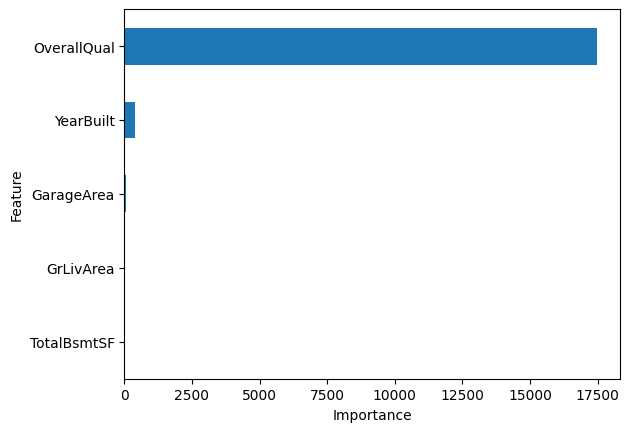

In [ ]:
importance = pd.Series(model.coef_, index=X_train_selected.columns).sort_values()
importance.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Обе части кода взаимодействуют между собой через переменные X_train_selected, X_val_selected и y_val.

Переменные X_train_selected и y_train используются для обучения модели линейной регрессии model.

Переменные X_val_selected и y_val используются для оценки качества модели с помощью метрики средней абсолютной ошибки mean_absolute_error.

Переменная coefficients использует информацию о модели, а именно, коэффициенты регрессии, которые были получены в результате обучения model. При этом, для вычисления коэффициентов регрессии были использованы признаки, выбранные в переменной features и полученные с помощью выделения соответствующих столбцов из X_train и X_val.

### Соотнести полученную из модели важность признаков с гипотезами из пункта 1, сделать выводы.

Из полученных результатов можно сделать следующие выводы:

*   OverallQual: результат для признака OverallQual наибольший среди всех выбранных признаков. Это может указывать на то, что общее качество дома оказывает самое сильное влияние на цену дома. Важность признака OverallQual соответствует гипотезе, что качество материалов и отделки, степень окончания строительства, а также общее впечатление от дома оказывают большое влияние на стоимость.

*   YearBuilt: результат для признака YearBuilt второй по величине среди выбранных признаков. Это может указывать на то, что дата постройки дома, оказывает значительное влияние на цену дома. Важность признака YearBuilt соответствует гипотезе, что дата постройки повышает стоимость дома.

*   GrLivArea и GarageArea: результаты для признаков GrLivAread и GarageArea находятся в середине по величине среди выбранных признаков. Это может указывать на то, что общая жилая площадь над уровнем земли (above grade living area) в квадратных футах (square feet) и площадь гаража могут оказывать умеренное влияние на цену дома. Важность признаков GrLivArea и GarageArea соответствует гипотезе о том, что общая жилая площадь над уровнем земли (above grade living area) в квадратных футах (square feet) и площадь гаража могут повысить стоимость дома.

*   TotalBsmtSF: результаты для признака TotalBsmtSF наименьший среди всех выбранных признаков. Это может указывать на то, общая площадь подвала не являются ключевым фактором в определении его стоимости. Важность признака TotalBsmtSF не согласуется с гипотезой о том, что большая общая площадь подвала может увеличить стоимость дома.